In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = df.applymap(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))

In [8]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [9]:
df = pd.concat([df, pd.get_dummies(df['furnishingstatus'],drop_first=True)], axis=1)

In [10]:
df.pop('furnishingstatus')

0           furnished
1           furnished
2      semi-furnished
3           furnished
4           furnished
            ...      
540       unfurnished
541    semi-furnished
542       unfurnished
543         furnished
544       unfurnished
Name: furnishingstatus, Length: 545, dtype: object

In [11]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False


In [12]:
change = {False:0, True:1}
df['semi-furnished'] = df['semi-furnished'].apply(lambda x: change[x])

In [13]:
change = {False:0, True:1}
df['unfurnished'] = df['unfurnished'].apply(lambda x: change[x])

In [14]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [15]:
y = df.pop('price')
x = df

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=45)

In [17]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
pd.DataFrame(model.coef_, x.columns, columns=["coefficient"])

,coefficient
area,2.719445e+02
bedrooms,1.013422e+05
bathrooms,1.058722e+06
stories,3.715978e+05
mainroad,4.068474e+05
guestroom,1.787251e+05
basement,4.036948e+05
hotwaterheating,8.059700e+05
airconditioning,9.381343e+05
parking,2.884960e+05


In [19]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [20]:
y_test[:5]

510    2520000
179    5215000
482    2940000
342    3850000
491    2835000
Name: price, dtype: int64

In [21]:
test_pred[:5]

array([2061198.26134738, 4943682.29536495, 2506221.11154046,
       5421137.5549071 , 2664698.57854648])

In [22]:
def prediction_evaluation(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f'MSE:{mse}')
    print(f'RMSE:{rmse}')
    print(f'MAE:{mae}')
    print(f'R2_Score:{r2*100}%')

    plt.scatter(actual, predicted, color='r')
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], ls='--', color='k')
    plt.xlabel("actual value")
    plt.ylabel("predicted value")
    plt.title("Test analysis")
    plt.show

MSE:1192976456232.704
RMSE:1092234.6159286036
MAE:853374.9520248435
R2_Score:60.08076871105277%


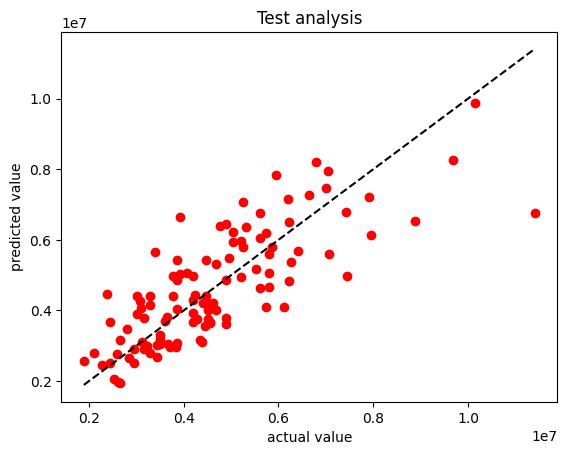

In [23]:
prediction_evaluation(y_test, test_pred)